<a href="https://colab.research.google.com/github/natalja-s/encoded-inequality-thesis/blob/main/Gendered_Adjective_Semantic_Clustering_Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Fix binary incompatibility issues (numpy, scipy, pandas, gensim)
!pip install --force-reinstall numpy==1.23.5 pandas==1.5.3 scipy==1.10.1 gensim==4.3.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 77.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 75.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 8.3 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successfully uninstalled pytz-2025.2
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled w

In [ ]:
!pip install seaborn scikit-learn
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
!pip install textblob
from textblob import TextBlob

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec.load('path/to/wiki_300_50_word2vec.model')
model = model.wv  # extract word vectors

In [ ]:
# Load files
female_path = 'data/female_adjectives.xlsx'
male_path = 'data/male_adjectives.xlsx'

df_female = pd.read_excel(female_path)
df_male = pd.read_excel(male_path)

df_female.columns = ['adjective', 'female_count']
df_male.columns = ['adjective', 'male_count']
df_female['adjective'] = df_female['adjective'].str.lower().str.strip()
df_male['adjective'] = df_male['adjective'].str.lower().str.strip()

# Merge
df = pd.merge(df_female, df_male, on='adjective', how='outer').fillna(0)
df['female_count'] = df['female_count'].astype(int)
df['male_count'] = df['male_count'].astype(int)
df['bias'] = df.apply(lambda row: 'female' if row['female_count'] > row['male_count'] else 'male', axis=1)

In [ ]:
# Extracting Word Vectors and Preparing for Embedding
def get_vector(word):
    try:
        return model[word]
    except KeyError:
        return None

df['vector'] = df['adjective'].apply(get_vector)
df_embed = df[df['vector'].notnull()].copy()
X = np.vstack(df_embed['vector'].values)

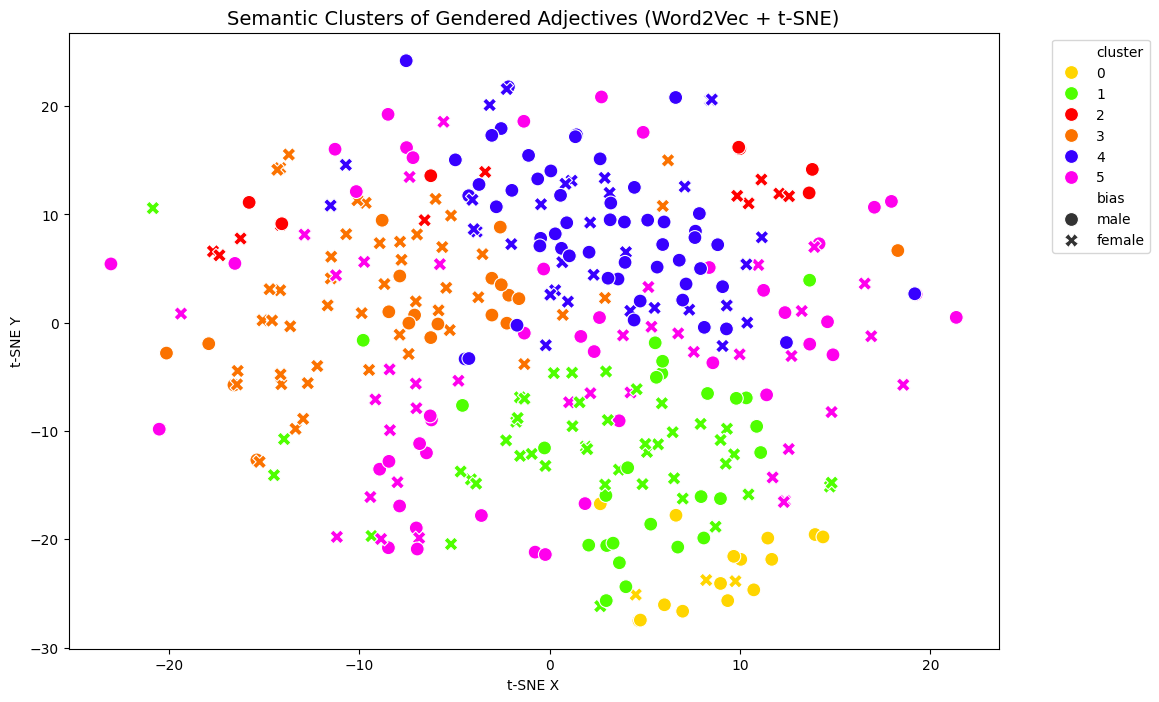

In [ ]:
# Semantic Clustering of Gendered Adjectives
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_embed['cluster'] = kmeans.fit_predict(X)

# t-SNE for 2D projection
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_coords = tsne.fit_transform(X)
df_embed['x'] = tsne_coords[:, 0]
df_embed['y'] = tsne_coords[:, 1]

# Create a rainbow palette and customize cluster colors
rainbow_palette = sns.color_palette("hsv", n_clusters)
custom_palette = list(rainbow_palette)
custom_palette[2] = '#ff0000'  # Cluster 2 = Red
custom_palette[3] = '#fb7200'  # Cluster 3 = Orange

# Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_embed,
    x='x', y='y',
    hue='cluster',
    style='bias',
    s=100,
    palette=custom_palette
)
plt.title("Semantic Clusters of Gendered Adjectives (Word2Vec + t-SNE)", fontsize=14)
plt.xlabel("t-SNE X")
plt.ylabel("t-SNE Y")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



In [ ]:
for i in range(n_clusters):
    print(f"\nCluster {i}")
    print(df_embed[df_embed['cluster'] == i]['adjective'].head(10).to_list())


Cluster 0
['administrative', 'catholic', 'congressional', 'conservative', 'democratic', 'electoral', 'federal', 'incumbent', 'judicial', 'legislative']

Cluster 1
['abstract', 'academic', 'adjunct', 'advisory', 'artistic', 'biological', 'charitable', 'civil', 'clinical', 'collaborative']

Cluster 2
['able', 'alive', 'aware', 'dead', 'familiar', 'fluent', 'guilty', 'happy', 'ill', 'interested']

Cluster 3
['autobiographical', 'beautiful', 'best', 'biographical', 'blind', 'bright', 'classic', 'comic', 'dark', 'descriptive']

Cluster 4
['automatic', 'bad', 'basic', 'big', 'brief', 'broad', 'clean', 'clear', 'complex', 'comprehensive']

Cluster 5
['active', 'advanced', 'aged', 'alternative', 'amateur', 'anti', 'assistant', 'associate', 'available', 'blank']


In [ ]:
df_embed.groupby(['cluster', 'bias']).size().unstack().fillna(0)

bias,female,male
cluster,,
0,3,15
1,46,26
2,11,8
3,46,19
4,32,53
5,41,45


In [ ]:
# Save clustered data for analysis
output_path = '/content/drive/MyDrive/THESIS/THESIS ANALYSIS/Adjective Analysis/adjective_clusters.csv'
df_embed.to_csv(output_path, index=False)

In [ ]:
cluster_gender_counts = df_embed.groupby(['cluster', 'bias']).size().unstack(fill_value=0)
cluster_gender_counts['total'] = cluster_gender_counts.sum(axis=1)
cluster_gender_counts['female_ratio'] = cluster_gender_counts['female'] / cluster_gender_counts['total']
cluster_gender_counts['male_ratio'] = cluster_gender_counts['male'] / cluster_gender_counts['total']
cluster_gender_counts

bias,female,male,total,female_ratio,male_ratio
cluster,,,,,
0,3,15,18,0.166667,0.833333
1,46,26,72,0.638889,0.361111
2,11,8,19,0.578947,0.421053
3,46,19,65,0.707692,0.292308
4,32,53,85,0.376471,0.623529
5,41,45,86,0.476744,0.523256


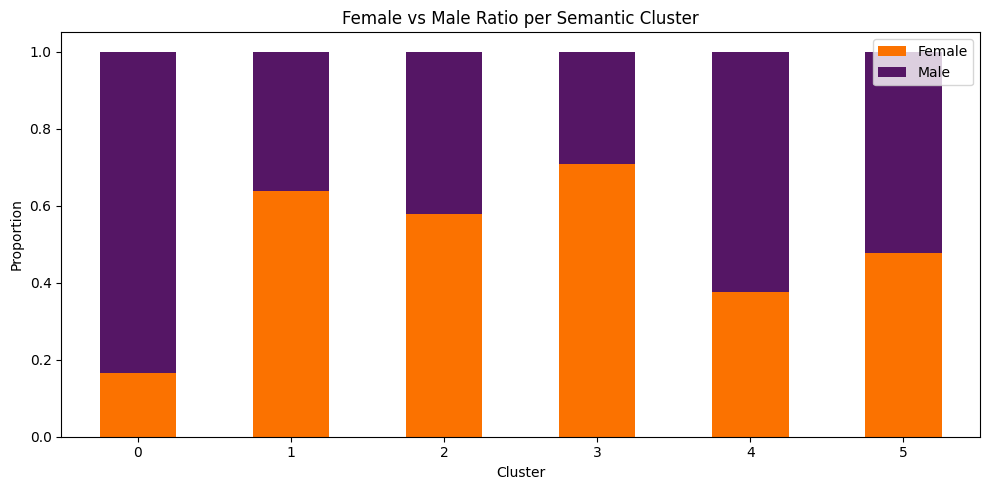

In [ ]:
#Female and Male Ratio per Cluster

# Recalculate cluster gender counts
cluster_gender_counts = df_embed.groupby(['cluster', 'bias']).size().unstack(fill_value=0)
cluster_gender_counts['total'] = cluster_gender_counts.sum(axis=1)
cluster_gender_counts['female_ratio'] = cluster_gender_counts['female'] / cluster_gender_counts['total']
cluster_gender_counts['male_ratio'] = cluster_gender_counts['male'] / cluster_gender_counts['total']

# Plot with custom colors (orange for female, lilac for male)
ax = cluster_gender_counts[['female_ratio', 'male_ratio']].plot(
    kind='bar',
    stacked=True,
    color=['#fb7200', '#551665'],  # Orange, Lilac
    figsize=(10, 5),
    title='Female vs Male Ratio per Semantic Cluster'
)

ax.set_ylabel('Proportion')
ax.set_xlabel('Cluster')
ax.legend(['Female', 'Male'], loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
# Most Gendered Words per Cluster

# Clustering
n_clusters = 6 # Define the number of clusters
# Add n_init=10 to suppress the FutureWarning in newer scikit-learn versions
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df_embed['cluster'] = kmeans.fit_predict(X)

# t-SNE for 2D projection
from sklearn.manifold import TSNE # Import TSNE here
# Add n_iter=300 to suppress the FutureWarning in newer scikit-learn versions
tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=300)
tsne_coords = tsne.fit_transform(X)
df_embed['x'] = tsne_coords[:, 0]
df_embed['y'] = tsne_coords[:, 1]

# Add a bias score (log ratio)
import numpy as np # Import numpy here
df_embed['log_bias'] = np.log((df_embed['male_count'] + 1) / (df_embed['female_count'] + 1))

# Top 5 biased words (male and female) per cluster
for i in range(df_embed['cluster'].nunique()):
    print(f"\nCluster {i}:")
    cluster_df = df_embed[df_embed['cluster'] == i]
    print("  Most female-biased:")
    print(cluster_df.sort_values(by='log_bias').head(5)[['adjective', 'log_bias']])
    print("  Most male-biased:")
    print(cluster_df.sort_values(by='log_bias', ascending=False).head(5)[['adjective', 'log_bias']])

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(



Cluster 0:
  Most female-biased:
        adjective  log_bias
161   legislative -0.095652
260     socialist -0.079765
84      electoral -0.022101
217  presidential  0.023952
180     municipal  0.026969
  Most male-biased:
          adjective  log_bias
311  constitutional  7.992269
32         catholic  0.508913
228      provincial  0.405262
157        judicial  0.362477
163         liberal  0.311689

Cluster 1:
  Most female-biased:
        adjective  log_bias
107      feminist -8.948976
211  postdoctoral -8.369157
88      emotional -8.223091
42       clinical -8.155936
119      graduate -8.085179
  Most male-biased:
      adjective  log_bias
314  diplomatic  8.157944
329       naval  8.138565
309    civilian  8.008033
324  managerial  7.999007
325     martial  7.976252

Cluster 2:
  Most female-biased:
     adjective  log_bias
215   pregnant -8.438150
288  unmarried -7.954021
112     fluent -7.756195
100   familiar -7.727976
174    married -0.584867
  Most male-biased:
       adjective

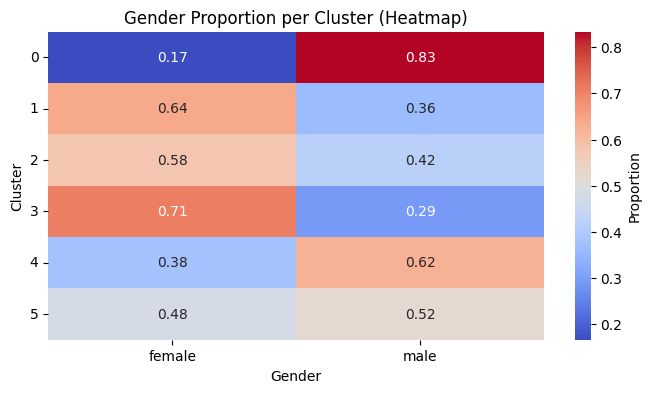

In [ ]:
# Heatmap
# Pivot the cluster x gender count matrix
gender_heatmap_data = df_embed.groupby(['cluster', 'bias']).size().unstack(fill_value=0)

# Optional: normalize to percentages
gender_heatmap_pct = gender_heatmap_data.div(gender_heatmap_data.sum(axis=1), axis=0)

# Plot heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(gender_heatmap_pct, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Proportion'})
plt.title("Gender Proportion per Cluster (Heatmap)")
plt.ylabel("Cluster")
plt.xlabel("Gender")
plt.yticks(rotation=0)
plt.show()